<a href="https://colab.research.google.com/github/jaw039/Google-Colab-Notebooks/blob/main/JW_CSE151A_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

In [ ]:
!git clone https://github.com/ucsd-cse151a-ss25/hw1.git

fatal: destination path 'hw1' already exists and is not an empty directory.


In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which OTHER attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

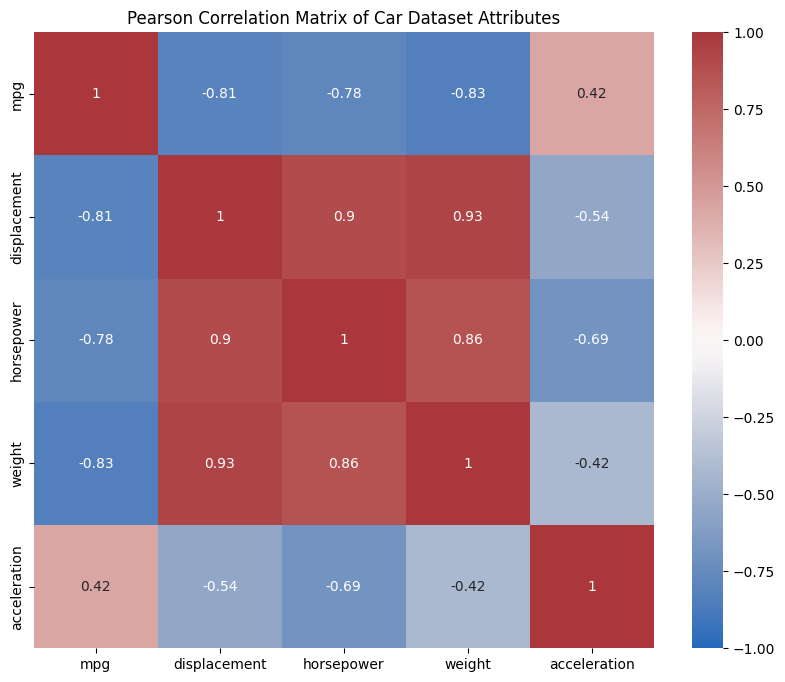

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/hw1/auto-mpg.csv')
# Drop the 'origin' column
df_new = df.drop('origin', axis = 1)
# Heatmap Correlation
correlation_matrix = df_new.corr(method = 'pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            cmap = 'vlag',
            vmin = -1,
            vmax = 1,
            center=0,
            annot=True)
plt.title('Pearson Correlation Matrix of Car Dataset Attributes')
plt.show()

**Answer:** Acceleration would be the worse because this attribute have the smallest absolute correlation with it being 0.42 which is the lowest numbers compared to the other attributes.

### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

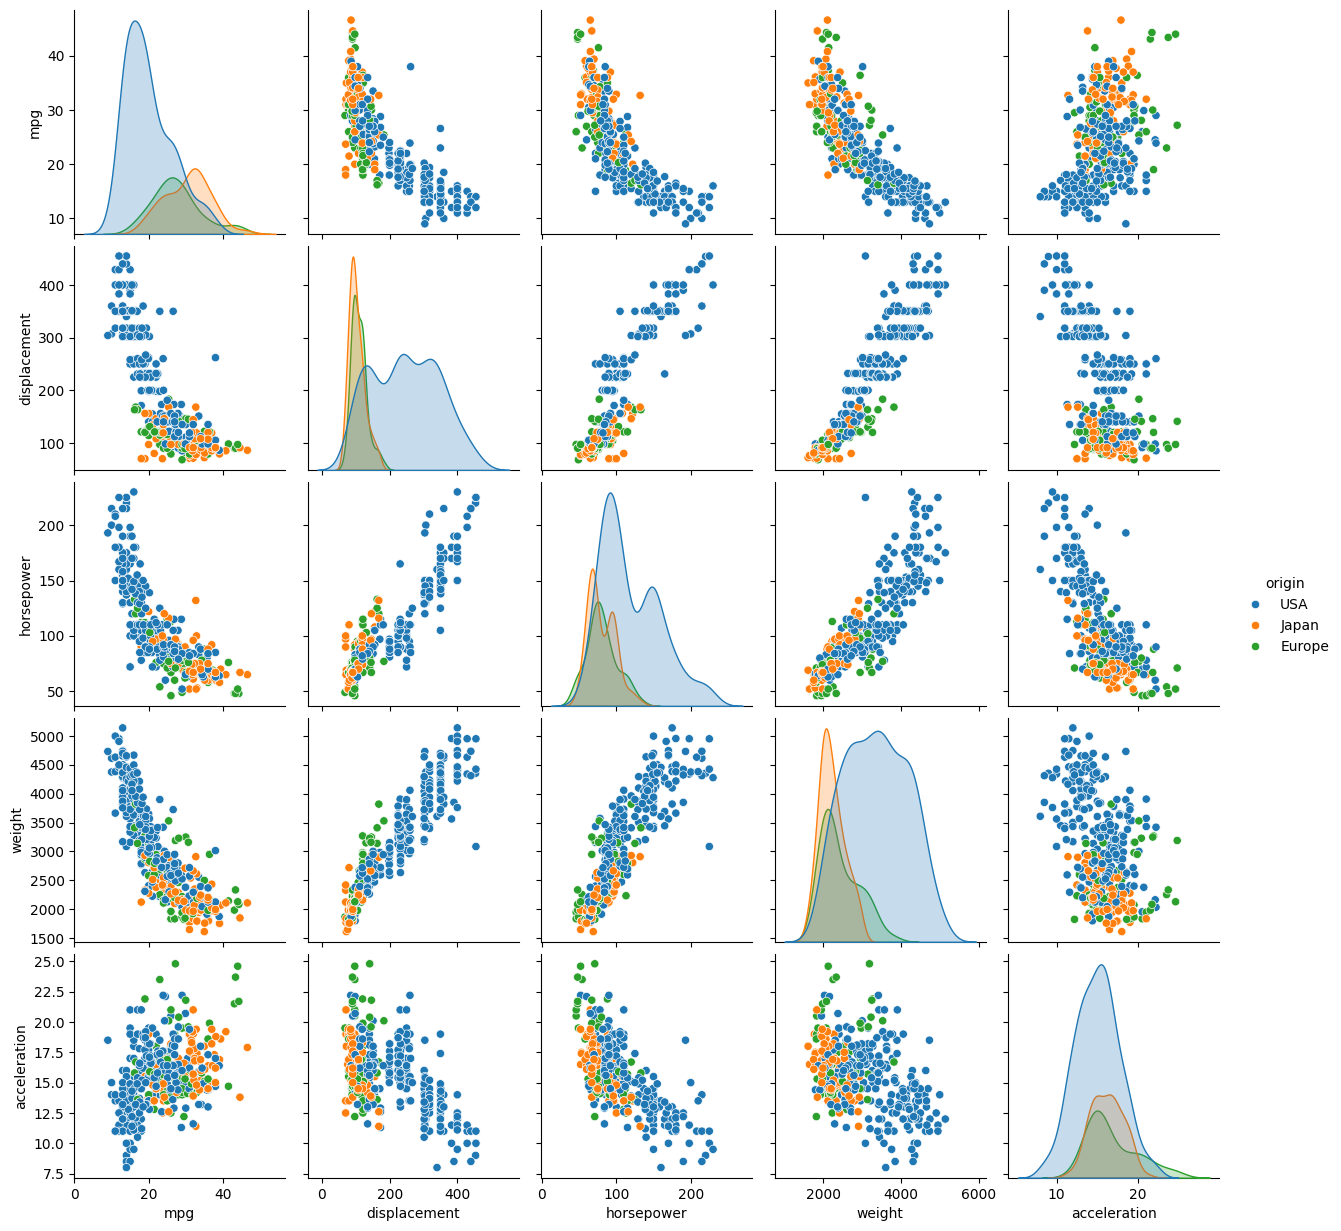

In [ ]:
## Generate scatter plot matrix
df1_2 = pd.read_csv('/content/hw1/auto-mpg.csv')
sns.pairplot(df1_2, hue = 'origin' )

**Answer:** I would use polynomial regression if we are using horsepower to predict mpg. As the relationship of the graph looks like a curve and it is best to use polynomial regression for curved data.

## Exercise 2 - Linear and Polynomial Regression (40 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

Print the shapes of the training and testing set.

In [ ]:
## found answer on stack over flow https://stackoverflow.com/questions/47202182/train-test-split-without-using-scikit-learn
# shuffle dataset
shuffle_df = df1_2.sample(frac=1)
# define a size for train set
train_size = int(0.8 * len(df1_2))
# split the dataset
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

print(train_set.shape)
print(test_set.shape)

(313, 6)
(79, 6)


### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

In [ ]:
# use this website https://www.geeksforgeeks.org/python/solving-linear-regression-without-using-sklearn-and-tensorflow/
# chatgpt 5 how to build a linear regressin model without sklearn
# learn how to normalize our features to help makes it easier to calculate
# learn how to properly use gradient descent for our model
# and learn how to calculate erros with python
## reshape dataframs into NumPy Arrays for gradient descent
## Linear Regression requires 1 input features
## Transform our arrays to matrix
X_train = train_set['weight'].values.reshape(-1,1)
Y_train = train_set['mpg'].values.reshape(-1,1)
X_test = test_set['weight'].values.reshape(-1,1)
Y_test = test_set['mpg'].values.reshape(-1,1)

## training the model
class Linear_Regression():
  # Initiating the 2 hyperparameters
  def __init__(self, learning_rate=1e-5, no_of_itr=500000):
      self.learning_rate = learning_rate
      self.no_of_itr = no_of_itr

  # Feature Normalization
  def normalize_features(self, X):
    self.mean = X.mean()
    self.std = X.std()
    return (X - self.mean) / self.std

  def fit(self, X, Y):
      # X.shape returns (314,1) so now we have
      # self.m = 314: number of rows (samples)
      # self.n = 1: Number of Columns (features)
      self.m, self.n = X.shape # Initialize self.m and self.n here
      # X.shape = self.m, self.n # This line is not needed after initializing self.m and self.n
      self.w = np.zeros((self.n, 1)) # Initialize weight to (1,1)
      self.b = 0.0 # Initialize bias to 0

      self.X_norm = self.normalize_features(X)
      self.Y = Y

      for i in range(self.no_of_itr):
          y_pred = self.X_norm @ self.w + self.b # y = mx + b
          error = y_pred - self.Y # Calculate our error
          # print(error)
          dw = (self.X_norm.T @ error) / self.m # Gradient for weight
          db = error.mean() # Gradient for bias

          ## Update our parameters
          self.w -= self.learning_rate * dw
          self.b -= self.learning_rate * db

  ## predict mpg for new cars
  def predict(self, X):
      X_norm = (X - self.mean) / self.std
      return X_norm @ self.w + self.b

# Train + evaluate
model = Linear_Regression(learning_rate=0.01, no_of_itr=1000)
model.fit(X_train, Y_train)

## MSE ERROR
Y_pred = model.predict(X_test)
mse = np.mean((Y_test - Y_pred) ** 2)
print("w:", float(model.w[0]),
      "b:", float(model.b),
      "Test MSE:", float(mse))

w: -6.486558730249456 b: 23.513361851818075 Test MSE: 14.63934315908374


/tmp/ipython-input-1008192650.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("w:", float(model.w[0]),


MSE Error: 18.64

### Exercise 2.3 - Polynomial Regression (25 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


In [ ]:
### Exercise 2.3 - Polynomial Regression (25 points)
# uses claude: how to implment polynomial regression in python without sklearn
# learn how to use create polynomial features
# learn how to use set our learning rate and epoch
# https://www.kaggle.com/code/jaypradipshah/polynomial-regression-from-scratch
# Took from this kaggle site
X_train = train_set['weight'].values.reshape(-1, 1)
y_train = train_set['mpg'].values.reshape(-1, 1)
X_test = test_set['weight'].values.reshape(-1, 1)
y_test = test_set['mpg'].values.reshape(-1, 1)

def poly_features(X, degree):
    m = X.shape[0]
    X_poly = np.ones((m, 1))  # bset bias
    for power in range(1, degree + 1):
        X_poly = np.concatenate((X_poly, X**power), axis=1)
    return X_poly

# Polynomial Regression Class
class PolynomialRegression():
    def __init__(self, degree=2, learning_rate=0.01, epochs=1000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.epochs = epochs

    def normalize_features(self, X, fit=False):
        if fit:
            self.mean = X[:, 1:].mean(axis=0)
            self.std = X[:, 1:].std(axis=0)
            self.std[self.std == 0] = 1
        X_norm = X.copy()
        X_norm[:, 1:] = (X[:, 1:] - self.mean) / self.std
        return X_norm

    def fit(self, X, y):
        # Create the polynomial features
        X_poly = poly_features(X, self.degree)
        X_poly_norm = self.normalize_features(X_poly, fit=True)

        # Initialize the weights
        self.W = np.zeros((X_poly_norm.shape[1], 1))

        # Train the model
        for epoch in range(self.epochs):
            y_pred = np.dot(X_poly_norm, self.W)
            error = y_pred - y
            gradient = (1/len(y)) * np.dot(X_poly_norm.T, error)
            self.W = self.W - self.learning_rate * gradient

    def predict(self, X):
        X_poly = poly_features(X, self.degree)
        X_poly_norm = self.normalize_features(X_poly, fit=False)
        return np.dot(X_poly_norm, self.W)

# print ("Answer:")
# # Degree 2
# print("\nDegree 2:")
model_2 = PolynomialRegression(degree=2, learning_rate=0.01, epochs=1000)
model_2.fit(X_train, y_train)

train_pred_2 = model_2.predict(X_train)
test_pred_2 = model_2.predict(X_test)

train_mse_2 = np.mean((y_train - train_pred_2)**2)
test_mse_2 = np.mean((y_test - test_pred_2)**2)

# print(f"Training MSE: {train_mse_2:.4f}")
# print(f"Testing MSE: {test_mse_2:.4f}")

# Degree 3
# print("\nDegree 3:")
model_3 = PolynomialRegression(degree=3, learning_rate=0.01, epochs=1000)
model_3.fit(X_train, y_train)

train_pred_3 = model_3.predict(X_train)
test_pred_3 = model_3.predict(X_test)

train_mse_3 = np.mean((y_train - train_pred_3)**2)
test_mse_3 = np.mean((y_test - test_pred_3)**2)

# print(f"Training MSE: {train_mse_3:.4f}")
# print(f"Testing MSE: {test_mse_3:.4f}")

# Degree 4
# print("\nDegree 4:")
model_4 = PolynomialRegression(degree=4, learning_rate=0.01, epochs=1000)
model_4.fit(X_train, y_train)

train_pred_4 = model_4.predict(X_train)
test_pred_4 = model_4.predict(X_test)

train_mse_4 = np.mean((y_train - train_pred_4)**2)
test_mse_4 = np.mean((y_test - test_pred_4)**2)

# print(f"Training MSE: {train_mse_4:.4f}")
# print(f"Testing MSE: {test_mse_4:.4f}")

**Answer:**
Degree 2:
Training MSE: 15.4774
Testing MSE: 22.3933

Degree 3:
Training MSE: 15.3361
Testing MSE: 22.1470

Degree 4:
Training MSE: 14.3721
Testing MSE: 21.0608


There is no sign of overfitting base on the results. Because test mse improves as degree increases from 2 - 4 degrees. In overfitting the test error would increase or plateau while the training error drops so in this case we do not have any overfitting.

## Exercise 3 - Logistic Regression (35 points in total)

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 3.1 - Processing and Splitting the Dataset (5 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >

Print the shapes and the unique values of the training and testing set origin column


In [ ]:
df = pd.read_csv('/content/hw1/auto-mpg.csv')
df_filtered = df[df['origin'].isin(['USA', 'Japan'])]

df_shuffled = df_filtered.sample(frac=1, random_state=42).reset_index(drop=True)
train_size = int(0.8 * len(df_shuffled))
train_set = df_shuffled[:train_size]
test_set = df_shuffled[train_size:]

print("Training set shape:", train_set.shape)
print("Training set unique origin values:", train_set['origin'].unique())
print("\nTesting set shape:", test_set.shape)
print("Testing set unique origin values:", test_set['origin'].unique())

Training set shape: (259, 6)
Training set unique origin values: ['USA' 'Japan']

Testing set shape: (65, 6)
Testing set unique origin values: ['Japan' 'USA']


### Exercise 3.2 - Logistic Regression (20 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br><br>
Now, given the results from models and plots from the previous questions, what do you think a hypothetical model would look like (in terms of accuracy) **if we are distinguishing between Japan and Europe** (instead of Japan and USA)? What would change if anything? Provide your reasoning in the text box below. Feel free to make comparisons based on your previous observations and results.

Requirements
 - Report the testing precision and recall for both regions for the Japan vs. USA model.
 - Provide reasoning for potential difference in accuracy when comparing Japanese and European cars

In [ ]:
# uses claude question: how do I use my gradient descent to make a logistic regression model # provided TA discusssions examples
# learn how does the cost function works as well as how do i create gradient in python as well as how do we use sigmond activation and linear combinations
# for this algorithm claude teaches me how to
# a) calculate error (predcitions - actual)
# b) calculate gradient using X.T @ error
# c) update weights by subtracting learning_rate * gradient
# keep repeating until it converges

features = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
X_train = train_set[features].values
X_test = test_set[features].values
y_train = (train_set['origin'] == 'USA').astype(int).values
y_test = (test_set['origin'] == 'USA').astype(int).values

# Normalize features
x_min, x_max = X_train.min(axis=0), X_train.max(axis=0)
X_train = (X_train - x_min) / (x_max - x_min)
X_test  = (X_test  - x_min) / (x_max - x_min)


# Helper functions
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

# Add intercept
X_train = add_intercept(X_train)
X_test = add_intercept(X_test)

# Initialize
W = np.zeros(X_train.shape[1])
m = len(y_train)
alpha = 0.5
num_iter = 1000

# Train model
for i in range(num_iter):
    z = np.dot(X_train, W)
    f = sigmoid(z)

    gradient = np.dot(X_train.T, (f - y_train)) / m
    W -= alpha * gradient
    if i % 200 == 0:
        cost = (-y_train * np.log(f + 1e-8) - (1 - y_train) * np.log(1 - f + 1e-8)).mean()

preds_prob = sigmoid(np.dot(X_test, W))
preds = (preds_prob >= 0.5).astype(int)

accuracy = (preds == y_test).mean()

tp_usa = np.sum((preds == 1) & (y_test == 1))
fp_usa = np.sum((preds == 1) & (y_test == 0))
fn_usa = np.sum((preds == 0) & (y_test == 1))

precision_usa = tp_usa / (tp_usa + fp_usa)
recall_usa = tp_usa / (tp_usa + fn_usa)
tp_japan = np.sum((preds == 0) & (y_test == 0))
fp_japan = np.sum((preds == 0) & (y_test == 1))
fn_japan = np.sum((preds == 1) & (y_test == 0))
precision_japan = tp_japan / (tp_japan + fp_japan)
recall_japan = tp_japan / (tp_japan + fn_japan)

# print("\nTesting Precision and Recall:")
# print(f"USA   - Precision: {precision_usa:.4f}, Recall: {recall_usa:.4f}")
# print(f"Japan - Precision: {precision_japan:.4f}, Recall: {recall_japan:.4f}")

**Answer:**
USA   - Precision: 0.9434, Recall: 0.9259
Japan - Precision: 0.6667, Recall: 0.6667

Japan vs USA model would achieved imbalanced results (USA: 0.94/0.92, Japan: 0.67/0.67). The model struggles to identify Japanese cars due to overlapes with the USA cars.
Compare that to Japan vs Europe, their model would perform better because the pairplot clearly shows that japanaese car cluster tightly at high mpg/low weight and european car weight in the middle range and their less overlaps between them. Japan and European would be easier to distginish as Japan focuses on efficenciy while Europe focuses on performance. They are both separate entities. But if we compare US vs Japan the model wouldn't be able to perform as well as both USA and Japan makes similar cars.

### Exercise 3.3 - Model coefficients (10 points)

Using all the attributes used in 3.2, plot the model coefficients in a scatter plot as shown in class. Explain the contribution of the 3 most informative (most influential) coefficients, and interpret their meaning and their contribution to the $\hat{y}$ prediction. Example can be found [here](https://quantifyinghealth.com/interpret-logistic-regression-coefficients/)

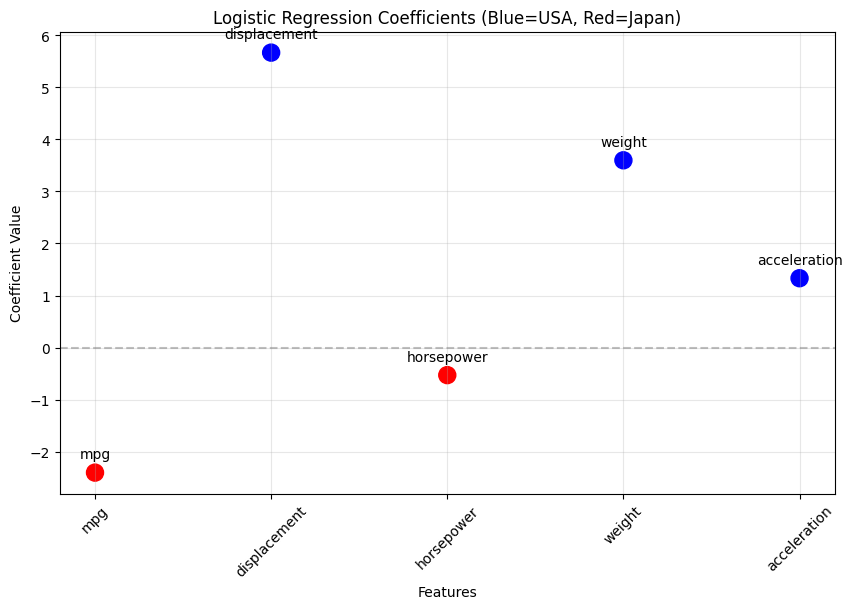

In [ ]:
# Get coefficients
coefficients = W[1:]
features = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

# Plot coefficients
plt.figure(figsize=(10, 6))
colors = ['red' if c < 0 else 'blue' for c in coefficients]
plt.scatter(range(len(features)), coefficients, s=150, c=colors)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

for i, (feat, coef) in enumerate(zip(features, coefficients)):
    plt.annotate(feat, (i, coef), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients (Blue=USA, Red=Japan)')
plt.xticks(range(len(features)), features, rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

## uses claude to learn how to graph the coefficients
# ask how I extract the coefficients as W[0] is the intercept but we starts at 1 through 5 for 5 features (extract those features for our coefficeints)
# learn how to create a scatter plot for value thats more than 1 and less than 1 # learn how to make a reference line
# also learn how to add label to our points

**Answer:**
Top 3 most influential coeffcient are
1. Displacement at 5.67. This means that USA have the largest engines. (Largest Positive Coefficient)
2. Weight at 3.60. Heavier car are most likely to be american. As US tends to prefer bigger cars like SUV or trucks compare to Japan where they like smaller cars. (Positive Coefficient)
3. MPG at -2.41 Higher fuel efficiency indicate that Japanese are more focus on fuel efficient cars. (negatice coefficient)

These coefficients form the decision boundary, the model classifies cars with large displacement and high weight as USA (positive contributions push toward 1), while high MPG pushes toward Japan (negative contribution pushes toward 0).

## Exercise 4 - Collaborative Statement (5 points)

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

Even if you did not use any outside resources or collaborate with anyone, please state that explicitly in the space below.

I completed this assignment independently with no person-to-person collaboration. I consulted: Claude (for clarifying GD/logistic updates and plotting), Stack Overflow (Pandas split), Kaggle (polynomial features/training loop ideas), and GeeksforGeeks (linear regression without scikit-learn). I reimplemented all code myself; resources were used only for understanding.